# TP3 - détection de graphes biparti

Dans le cours, [chapitre 2, page 32](http://www.fil.univ-lille1.fr/~varre/portail/graphes/docs/chap02-parcours.pdf), il est question des graphes biparti comme une application au parcours de graphes.

L'objectif de ce TP est de mettre en œuvre l'algorithme décrit dans ce chapitre et de comprendre un peu mieux la caractérisation des graphes biparti.

In [8]:
import networkx as nx
import matplotlib as plt

## Approche du problème

Après avoir lu la définition 11, construire à la main un graphe connexe biparti à 8 sommets, dont le nombre de sommets de chaque partition est 4, avec un minimum d'arêtes.

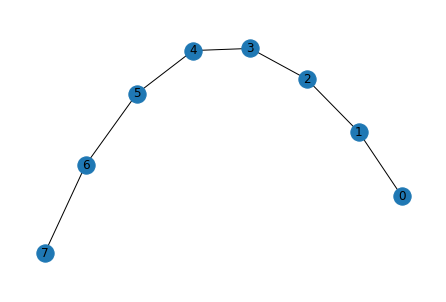

In [9]:
g8 = nx.Graph([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7)])
nx.draw(g8,with_labels=True)

En nommant le graphe construit `g8`, on pourra tester qu'il est bien biparti grâce à l'algorithme fourni dans NetworkX.

In [10]:
from networkx.algorithms import bipartite
v1, v2 = bipartite.sets(g8)
print(v1,v2)

{0, 2, 4, 6} {1, 3, 5, 7}


En utilisant le code suivant permettant de créer toutes les partitions d'une liste, construire un prédicat `est_biparti_naif` qui prend en entrée un graphe non orienté NetworkX et décide si le graphe est biparti en utilisant l'algorithme naïf qui énumère toutes les partitions possibles des sommets et teste pour chaque partition si il existe une arête entre ses sommets.

In [11]:
def partition(collection):
    """
    Prend en entrée une collection d'objets (typiquement une liste d'entiers) 
    et produit une énumération de toutes les partitions.
    
    >>> list(partition([1, 2, 3]))
    [[[1, 2, 3]], [[1], [2, 3]], [[1, 2], [3]], [[2], [1, 3]], [[1], [2], [3]]]
    """
    if len(collection) == 1:
        yield [ collection ]
        return

    first = collection[0]
    for smaller in partition(collection[1:]):
        # insert `first` in each of the subpartition's subsets
        for n, subset in enumerate(smaller):
            yield smaller[:n] + [[ first ] + subset]  + smaller[n+1:]
        # put `first` in its own subset 
        yield [ [ first ] ] + smaller

Exemple d'utilisation de partition :

In [12]:
something = list(range(1,5))
for n, p in enumerate(partition(something), 1):
    print(n, sorted(p))

1 [[1, 2, 3, 4]]
2 [[1], [2, 3, 4]]
3 [[1, 2], [3, 4]]
4 [[1, 3, 4], [2]]
5 [[1], [2], [3, 4]]
6 [[1, 2, 3], [4]]
7 [[1, 4], [2, 3]]
8 [[1], [2, 3], [4]]
9 [[1, 3], [2, 4]]
10 [[1, 2, 4], [3]]
11 [[1], [2, 4], [3]]
12 [[1, 2], [3], [4]]
13 [[1, 3], [2], [4]]
14 [[1, 4], [2], [3]]
15 [[1], [2], [3], [4]]


In [44]:
def est_biparti_naif (graphe):
    res = list(graphe.nodes())
    listpart = partition(res)
    aretes = graphe.edges()
    i = 0
    for part in listpart :
        for p in part :
            for i in range(len(aretes)) :
                if edges(i,p) :
                    i+=1
                    if i == len(part) :
                        return True
                else :
                    part+=1
            p+=1
    return False
    
def edges(arete, partition) :
    i = 0
    res = 0
    for p in partition :
        for i in range(arete) :
            if i == p :
                res+=1
                i+=1
            else :
                p+=1
    return res!=2
            

In [45]:
est_biparti_naif(g8)

True

Compléter avec d'autres tests.

In [27]:
g9 = nx.Graph([(0,1),(1,2),(0,2)])
est_biparti_naif(g9)

True

## Implantation basée sur le théorème 2.4.1

On va maintenant implanter l'algorithme décrit dans le polycopié qui exploite le théorème 2.4.1.

Dessinner tous les graphes **connexes** à 4 sommets (on prendra soin de ne pas condidérer les graphes isomorphes). Identifier le nombre de cycles de longueur impaire pour chacun. Trouver les graphes bipartis et vérifier le théorème 2.4.1.

Appliquer à la main l'algorithme 9 du polycopié sur le graphe à 8 sommets que vous avez construit au début du TP.

Note : en NetworkX on peut ajouter des propriétés (attributs) aux sommets, et ainsi les colorier comme le font souvent les algorithmes de graphe.

In [ ]:
G = nx.path_graph(3)
print(G.nodes(data=True))
nx.set_node_attributes(G, 'white', 'color' )
print(G.nodes(data=True))
print(G.nodes[0]['color'])

Implanter le prédicat `est_biparti` en utilisant l'algorithme 9 du polycopié.

In [ ]:
def est_biparti(graphe):
    return True

Tester (bien entendu).